* input : n patients each with tn expected time to be seen by a physician
* output: patient queue arrangement
* task: minimum sum of waiting time

> eg: 
    
    to,t1,...,tn are treatment times and w0, w1,... ,wn are waiting times per patient then : 
    
    w0= 0
    w1 = t0
    w2 = t1 + t0
    w3 = t2 + t1 + t0
    ...
    wn = w(n-1) + t(n-1)
    
    then
    total_waiting_time = Σw | j 0:n
    total_waiting_time = n*t0 + (n-1)*t1 + (n-2)*t2 + ... + 2*t(n-2) + t(n-1)
    
    given that coefficients n>n-1>n-2>...>0:
    the queue arrangement that makes the total_waiting_time smallest is t0<t1<t2<...<tn
     

## Naive Algorithm

In [1]:
import itertools
import numpy as np

def getPermutations(list_):
    # list of all possible que arrangements by treating each patient
    return list(itertools.permutations(list_))

def getTotalWaitingTime(perm_list, waiting_times):
    # total waiting times per queue arrangement
    waiting_time_perm = {}
    for perm in perm_list:
        new_waiting_times = [waiting_times[k] for k in perm] # rearange waiting times according to new que arrangement of pattients
        k=0
        total_waiting_times = 0
        for waiting_time in new_waiting_times:
            if k == 0:
                waiting_time_given_patient = 0
            else:
                waiting_time_given_patient += new_waiting_times[k-1]
            total_waiting_times +=waiting_time_given_patient
            k+=1
        waiting_time_perm[perm] = total_waiting_times
    return waiting_time_perm


def getOptArrangement(waiting_time_perm):
    # optimal queue arrangement and minimum patitient waiting time
    minValue = min(list(waiting_time_perm.values()))
    queue_arrangement = [arrangement for arrangement, value in waiting_time_perm.items() if value == minValue][0]
    return minValue, queue_arrangement

In [2]:
waiting_times = [50, 40, 30, 20, 10]
patient_list = [0, 1, 2, 3, 4]
perm_list =  getPermutations(patient_list)
waiting_time_perm = getTotalWaitingTime(perm_list, waiting_times)
getOptArrangement(waiting_time_perm)

(200, (4, 3, 2, 1, 0))

In [3]:
# performance

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
from time import time
get_ipython().run_line_magic('matplotlib', 'inline')
import numpy as np
def plotPerformance(performance,algoName,title):
    try:
        bs = pd.DataFrame(performance)
        bs.columns=['input_size','mseconds']
        fig, ax = plt.subplots()
        _=ax.set_title(title)
        _=ax.plot(bs.input_size,bs['mseconds'],label=algoName,color='blue')
        _=ax.legend()
        _=ax.grid()
        _=ax.set_xlabel('input size')
        _=ax.set_ylabel('mili seconds')
        return True
    except Exception as e:
        print(e)
        return False

In [13]:
performance=[]
for k in range(6):
    waiting_times = list(np.random.random_integers(1,50,k+2))
    patient_list = [m for m in range(len(waiting_times))]
    t0 = time()*1000 # miliseconds
    perm_list =  getPermutations(patient_list)
    waiting_time_perm = getTotalWaitingTime(perm_list, waiting_times)
    getOptArrangement(waiting_time_perm)
    t1 = time()*1000 # miliseconds
    t_delta = (t1-t0)
    k +=1
    performance.append((k,t_delta))

C:\Program Files (x86)\Microsoft Visual Studio\Shared\Anaconda3_64\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: This function is deprecated. Please call randint(1, 50 + 1) instead
  This is separate from the ipykernel package so we can avoid doing imports until


True

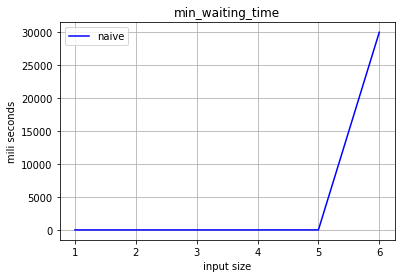

In [14]:
plotPerformance(performance,'naive','min_waiting_time')